# Data Analysis and Sweep Parameter File Automation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [22]:
# setting directories and globals
runfile_directory = 'Runfiles/'
results_directory = 'Results/'
template_file = 'template.txt'

# TWEAKS MADE 4/28/24
HEY I MADE SOME TWEAKS TO THE ORIGINAL PARAMETER VALUES
Mean_tolerance dropped from 1.0 -> 0.5, 1.0 setting is too high for variation. 0.5 is more indicative of realistic thresholds for expectation of effort, std deviations also dropped to be half of  the mean

In [58]:
# variables of interest, and file name specifications
parameter_dict = {'*fname': ['Python/Results/'],
                  'steps': ['100'],
                 'reps': ['2'],
                 'num_groups': ['13'],
                 'num_agents_per_group': ['5'],
                 'max_strikes': ['3'],
                 'mean_tolerance': ['0.5'],
                  'std_tolerance': ['0.25'],
                  'mean_value': ['1.0'],
                  'std_value': ['0.5'],
                  'agent_std_value': ['0.1'],
                  'prop_deviant': ['0.2'],
                  'deviant_mean_tolerance' : ['0.25', '1.0', '0.5']
                 }

In [59]:
# function to modify the sweep file based on the parameters in parameteer_dict

def design_runfile(new_fname, parameter_dict=parameter_dict):
    with open(template_file) as template:
        template_lines = template.readlines()

    parameter_dict['*fname'] = [parameter_dict['*fname'][0] + new_fname.strip('.txt')]
    
    with open(runfile_directory + new_fname, 'w+') as new_file:
        for line in template_lines:
            param = line.split()[0]
            if param not in parameter_dict:
                new_file.write(line)
            else:
                fixer_upper = line.strip('\n').split()[:2]
                new_line = ' '.join(fixer_upper + (parameter_dict[param])) + '\n'
                new_file.write(new_line)

In [60]:
design_runfile('mod_num_groups_mean_tolerance.txt', parameter_dict)

# Actually Analyzing the Files after Sweeping

In [47]:
# function for pulling from results. returns spefic dfs for each level of granularity
def get_results(result_prefix):
    time_df = pd.read_csv(results_directory + result_prefix + 'timeresults.txt', skiprows=6)
    end_df = pd.read_csv(results_directory + result_prefix + 'endresults.txt', skiprows=6)
    return time_df, end_df

In [63]:
# example
result_prefix = "mod_num_groups_mean_tolerance"

time_df, end_df = get_results(result_prefix)

In [64]:
interested_independent_variable = 'deviant_mean_tolerance'
interested_dependent_variable = 'avg_deviant_payoff'
interested_dependent_variable_two = 'avg_standard_payoff'

def sort_by_sweep(time_df, interested_independent_variable, interested_dependent_variable, steps):
    dfs = [time_df[i:i+steps] for i in range(0, len(time_df), steps)]
    
    plt.figure()
    
    for df in dfs:
        x = df["Timestep"]
        y = df[interested_dependent_variable]
        y_two = df[interested_dependent_variable_two]
        
        interested_var_value = df[interested_independent_variable].iloc[0]
        
        plt.plot(x, y, linestyle='-', label=interested_dependent_variable)
        plt.plot(x, y_two, linestyle='-', label=interested_dependent_variable_two)

        # Add title and labels
        plt.title(f"{interested_independent_variable}={interested_var_value}")
        plt.xlabel("Timesteps")
        plt.ylabel("Average payoffs")
        
        plt.legend()
        plt.show()

def sort_by_sweep_but_relational(time_df, interested_independent_variable, interested_dependent_variable, steps):
    dfs = [time_df[i:i+steps] for i in range(0, len(time_df), steps)]
    
    plt.figure()
    
    for df in dfs:
        x = df["Timestep"][1:]
        y = df[interested_dependent_variable][1:]
        shift = [0] + list(y[:-1])
        
        y = [y_curr - y_prev for y_curr, y_prev in zip(y,shift)]
        
        
        y_two = df[interested_dependent_variable_two][1:]
        shift_two = [0] +  list(y_two[:-1])
        
        y_two = [y_curr - y_prev for y_curr, y_prev in zip(y_two,shift_two)]
        
        interested_var_value = df[interested_independent_variable].iloc[0]
        
        plt.plot(x, y, linestyle='-', label=interested_dependent_variable)
        plt.plot(x, y_two, linestyle='-', label=interested_dependent_variable_two)

        # Add title and labels
        plt.title(f"{interested_independent_variable}={interested_var_value}")
        plt.xlabel("Timesteps")
        plt.ylabel("Average payoffs increases between steps")
        
        plt.legend()
        plt.show()

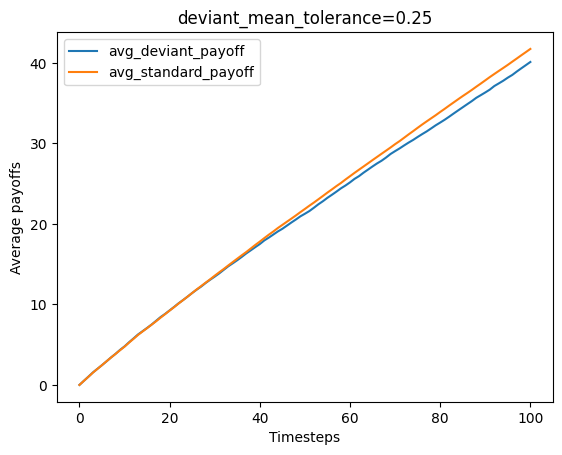

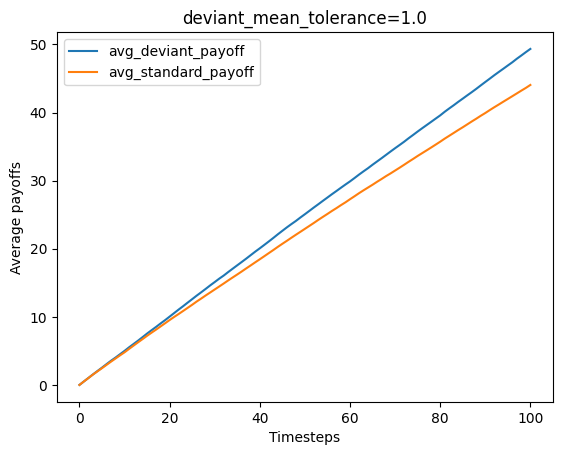

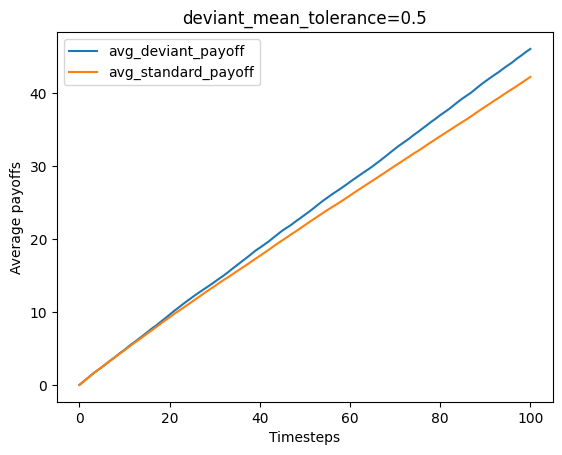

In [65]:
sort_by_sweep(time_df,interested_independent_variable, interested_dependent_variable, 101)

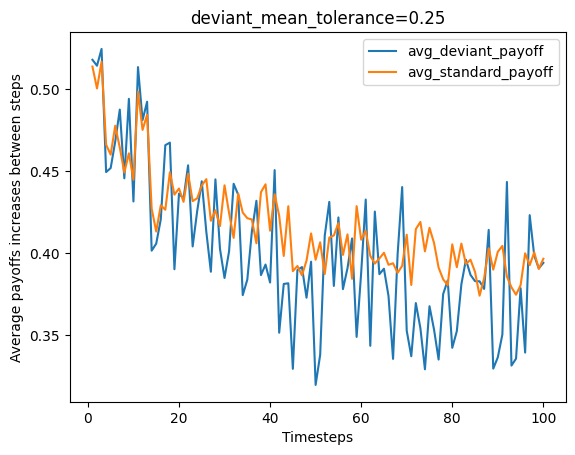

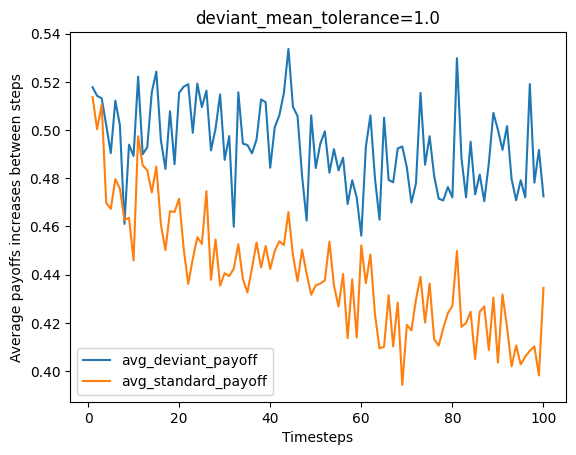

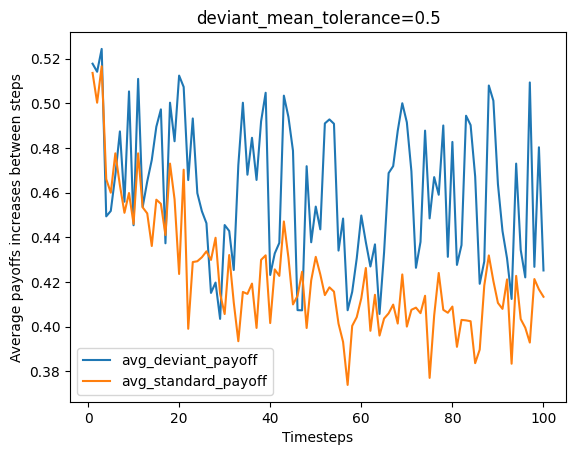

In [66]:
sort_by_sweep_but_relational(time_df,interested_independent_variable, interested_dependent_variable, 101)

# Analyzing Agent Files
I've  hacked together some semblance of agent data collection with raw file writing,

In [67]:
# parameter variables
agent_directory = "Agent_data/"
agent_file_prefix = "mod_num_groups_mean_tolerance_Agent-"

In [68]:
def get_agent_results(agent_file_prefix, time_steps):
    agent_dfs = {}
    for filename in os.listdir(agent_directory):
        file_path = os.path.join(agent_directory, filename)
        # Check if it's a regular file (not a directory)
        if os.path.isfile(file_path):
            temp = open(file_path, 'r')
            temp_lines = temp.readlines()
            num_sections = len(temp_lines)//(time_steps+1)
            df_set = []
            for i in range(num_sections):
                df = pd.read_csv(file_path, skiprows = i*(time_steps+1), nrows = time_steps+1)
                df_set.append(df)
            agent_dfs[filename.strip(agent_file_prefix).strip(".txt")] = df_set
    return agent_dfs

In [69]:
agent_dfs = get_agent_results(agent_file_prefix, 100)

In [70]:
# auhhuhuhuhhuh
variable_parameters = ['num_groups', 'deviant_mean_tolerance']

# define a function that splits the agent data into categories based on the variable-parameters
def categorize(agent_dfs):
    aaall_the_data = {}
    for agent_id, df_set in agent_dfs.items():
        for df in df_set:
            

SyntaxError: unexpected EOF while parsing (4202403125.py, line 9)

In [71]:
# I just need the data for deviant_mean_tolerance = 0.5, actually, feeling a lil brain-dead
# 0 = standard, 1 = deviant

track_deviant_movement = {}

for agent, dfset in agent_dfs.items():
    for df in dfset:
        if df['type'][0] == 1:
            track_deviant_movement[agent] = df['group_id'].values

print(track_deviant_movement)

{'11': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64), '17': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64), '18': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3